# House Sales Analysis in NorthWestern county

## 1. Business Understanding
### a) Introduction

House sales began in 1890s in the United States and since then its been growing all over the world and agencies started to form to enhance and ease the house selling process.Last year the revenue was estimated to be $4.25M with prospects of growth as time goes by. House sales are mainly influenced by the number of bedrooms, bathrooms, the year built, square footage and whether renovations are done or not among other factors.

In this case the Northwest agencies aim to address the need of providing homeowners with accurate and actionable advice on how home renovations can potentially increase the estimated value of their properties and by what amount. By understanding the relationship between various renovation factors and house prices, the agencies can be able to guide homeowners in making informed decisions about renovations, which will ultimately lead to maximization of return on their investment which will enable them sell their homes at optimal prices.

### b) Problem statement

The real estate industry faces the challenge of providing homeowners with reliable information about how various home renovation factors impact the estimated value of their homes. Our project addresses this problem by utilizing data analysis and regression modeling to identify key factors that affect house prices in a northwestern county. By understanding these factors, we can provide recommendations and insights to stakeholders on how to effectively advise homeowners on renovations that can potentially increase the value of their properties.

### c) Main Objective

The main objective of this project is to develop a predictive model that estimates house prices based on various features such as the number of bedrooms and bathrooms, square footage, and year built. By building a robust regression model, we aim to accurately predict house prices and provide stakeholders with valuable insights into the factors driving price fluctuations.

### d) Metric of success

The success of our project will be evaluated based on the model's performance in predicting house prices. We will use evaluation metrics such as the coefficient of determination (R-squared) and root mean square error (RMSE) to assess the model's accuracy. A higher R-squared value and lower RMSE indicate a more successful model in capturing the variations in house prices.

### e) Specific Objectives

- Explore and preprocess the King County House Sales dataset, including handling missing values, transforming features, and encoding categorical variables.
- Perform exploratory data analysis to gain insights into the distribution and relationships between different features and the target variable.
- Conduct feature selection to identify the most influential factors that affect house prices and eliminate irrelevant or redundant features.
- Build multiple linear regression models with different combinations of features and evaluate their performance using appropriate metrics.
- Interpret the results of the final regression model, including the coefficients of the selected features and their implications on house prices.
- Provide recommendations to stakeholders based on the insights gained from the modeling process, suggesting specific renovation factors that homeowners can focus on to increase the estimated value of their properties.

##  2. Data Understanding

We will be utilizing the King County House Sales datasets which contains information on house sales, including features such as price, number of bedrooms and bathrooms, square footage, and year built. By thoroughly understanding and analyzing the dataset and its column descriptions, we can identify the relevant features to include in our analysis and modeling process


## 3. Data Preparation

This process involves cleaning, transforming, and organizing the data to ensure its suitability for analysis and modeling. 

- Importing relevant libraries
- Loading the dataset and checking it contains
- Dealing with missing data
- Checking and removing duplicates
- Handling outliers
- Feature scaling and normalization using z-scores
- Encoding categoriacl variables using one-hot encoding
- Exploring the dataset to identify opportunities for creating new features that may enhance the predictive power of the model 
- Splitting the dataset into training and test sets


### Importing libraries

In [3]:
# importing libraries
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Loading the dataset

In [5]:
# reading the house dataset and previewing the first five outputs
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
# getting an overview of the dataset, including the number of non-null values and the data types of each column
print(data.info())
# getting the number of rows and columns in the data.
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21597 rows and 21 columns

In [6]:
# checking the datatypes of each columns
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# generating summary statistics for the numerical columns in the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Most houses have an average of 3 bedrooms,2 bathrooms and were built between 1970 and 2015

### Checking for missing values

In [8]:
# checking the proportion of missing values per column
data.isna().sum()/len(data)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [9]:
# since waterfront has missing values, we first check the value counts
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [10]:
# filling in missing values in the 'waterfront' column with the string 'NO'
data['waterfront'] = data['waterfront'].fillna('NO')
# getting an overview of the dataset after filling the missing values in Waterfront
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We filled the missing values in waterfront instead of removing them since we want each column to have the same number of rows.
we can now see that the waterfront column has the same values as the other columns we will be using.

In [12]:
# dropping columns that we will not be using in data analysis.
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(columns_to_drop, axis=1, inplace=True)
#data.drop(columns=['column_name1', 'column_name2', ...], axis=1

In [13]:
# checking to see if the columns have been dropped.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [14]:
# checking if there are any duplicates
data.duplicated().any()

True

In [15]:
# checking the sum of duplicated ids
data['id'].duplicated().sum()
# dropping the duplicated values and keeping the first in id column
data = data.drop_duplicates(subset='id', keep='first')

In [16]:
# now checking the if there are any duplicated values
data.duplicated().any()

False

In [17]:
# checking the rows and columns after dropping duplicates and unwanted columns.
data.shape

(21420, 11)

## Explotory data analysis

### Univariate analysis

### Dealing with outliers

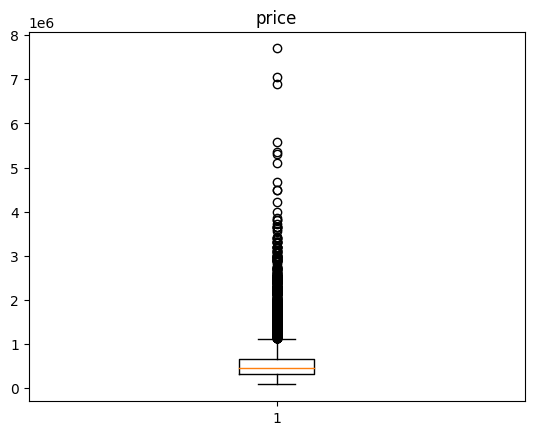

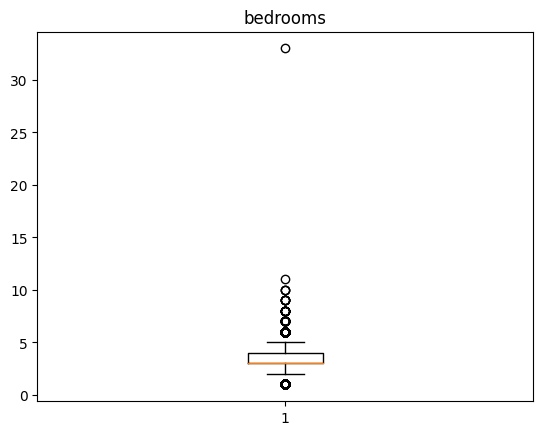

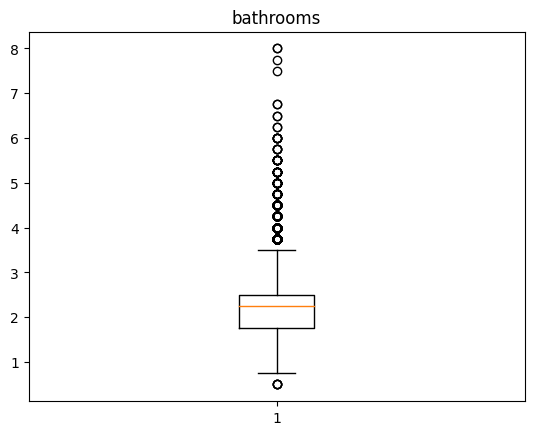

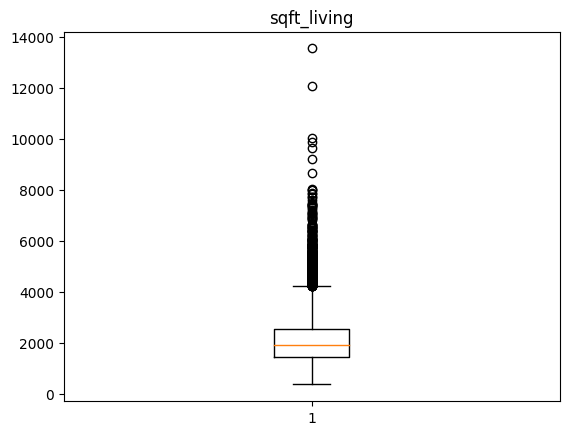

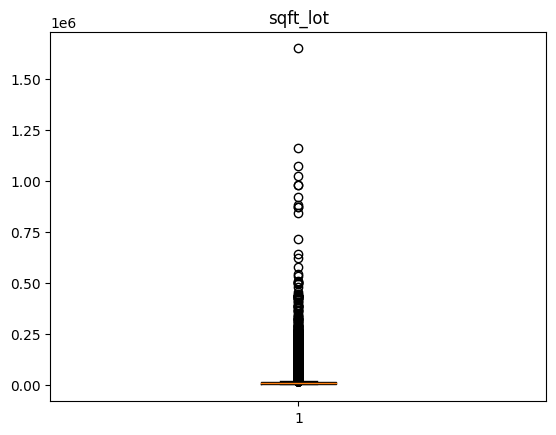

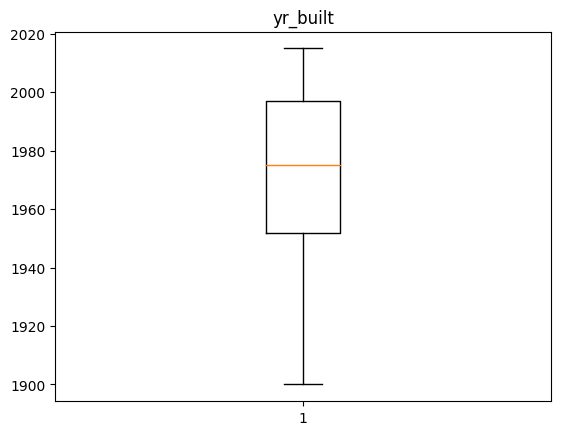

In [18]:
# Selecting the numerical columns in the dataset
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

# Calculating z-scores for the numerical columns
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

# defining a threshold for identifying outliers
threshold = 3

# Find the indices of outliers for each column
outlier_indices = (z_scores > threshold).any(axis=1)

# Extract the outlier rows from the dataset
outliers = data[outlier_indices]

# Plotting the outliers
for column in numeric_columns:
    plt.figure()
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()


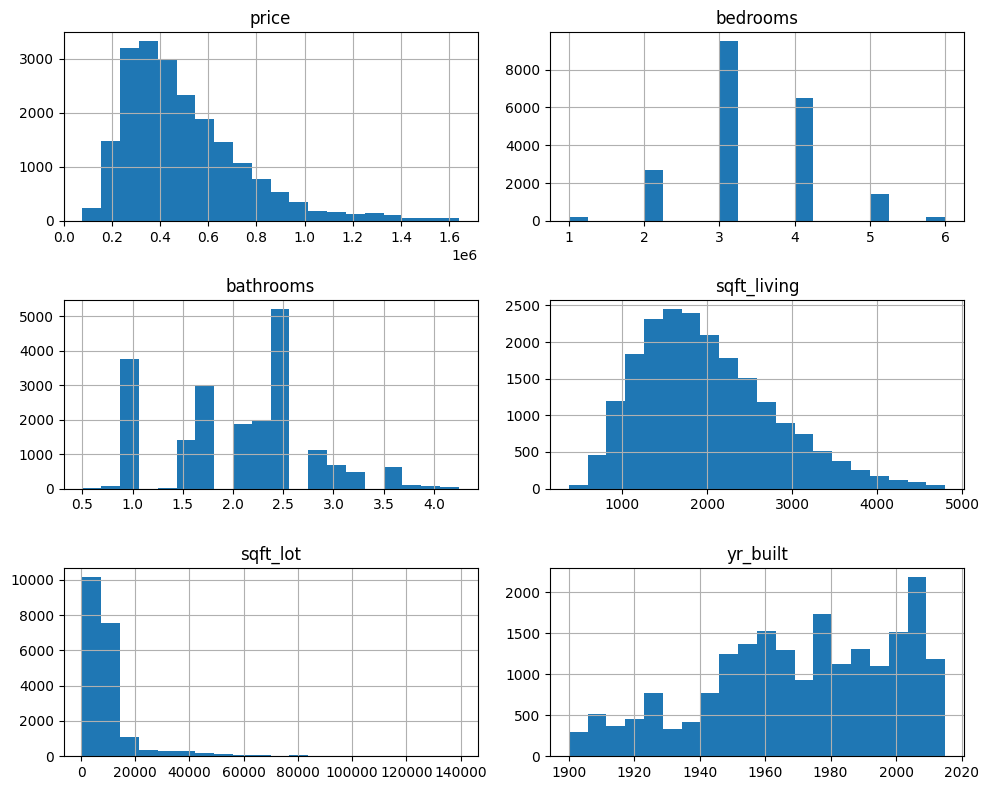

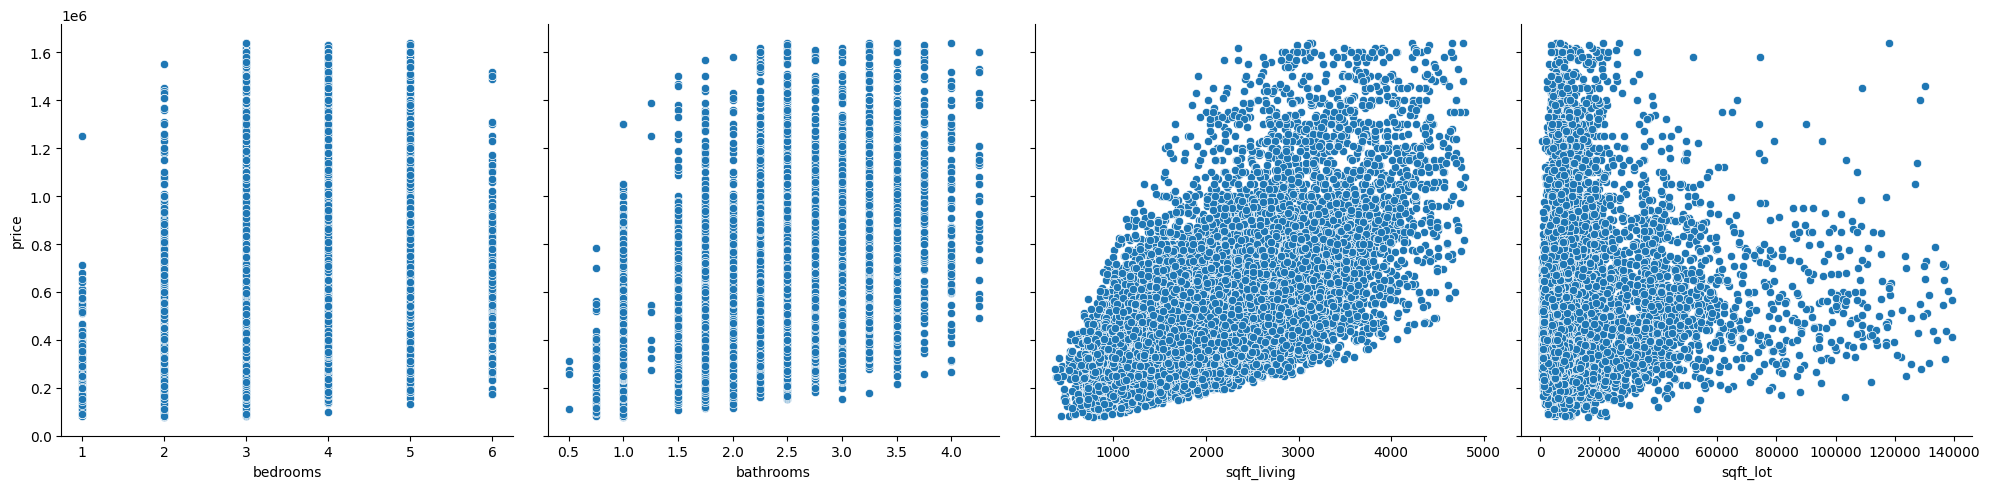

In [19]:
# Removing the outlier rows from the dataset
data_cleaned = data[~outlier_indices]

# Reset the index of the cleaned dataset
data_cleaned.reset_index(drop=True, inplace=True)

# Plot histograms of the cleaned dataset
data_cleaned[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot scatterplots of price against other numeric columns
sns.pairplot(data_cleaned, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], y_vars='price', height=5)
plt.tight_layout()
plt.show()



 ## Data analysis

In [21]:
# checking for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['waterfront', 'condition', 'grade'], dtype='object')

In [22]:
# exploring categorical variables,using value_counts() to get the count of each unique value in a column 
# using describe() to get summary statistics for categorical columns.
for column in categorical_columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

# Summary statistics for categorical columns
print(data[categorical_columns].describe())


Value counts for waterfront:
waterfront
NO     21274
YES      146
Name: count, dtype: int64

Value counts for condition:
condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64

Value counts for grade:
grade
7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

       waterfront condition      grade
count       21420     21420      21420
unique          2         5         11
top            NO   Average  7 Average
freq        21274     13900       8889


In [29]:
# Correlation analysis
correlation_matrix = data_cleaned[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built
price        1.000000  0.310352   0.472272     0.647605  0.101879  0.041638
bedrooms     0.310352  1.000000   0.501961     0.604653  0.085316  0.172820
bathrooms    0.472272  0.501961   1.000000     0.719686  0.069573  0.539369
sqft_living  0.647605  0.604653   0.719686     1.000000  0.230827  0.340219
sqft_lot     0.101879  0.085316   0.069573     0.230827  1.000000  0.038727
yr_built     0.041638  0.172820   0.539369     0.340219  0.038727  1.000000


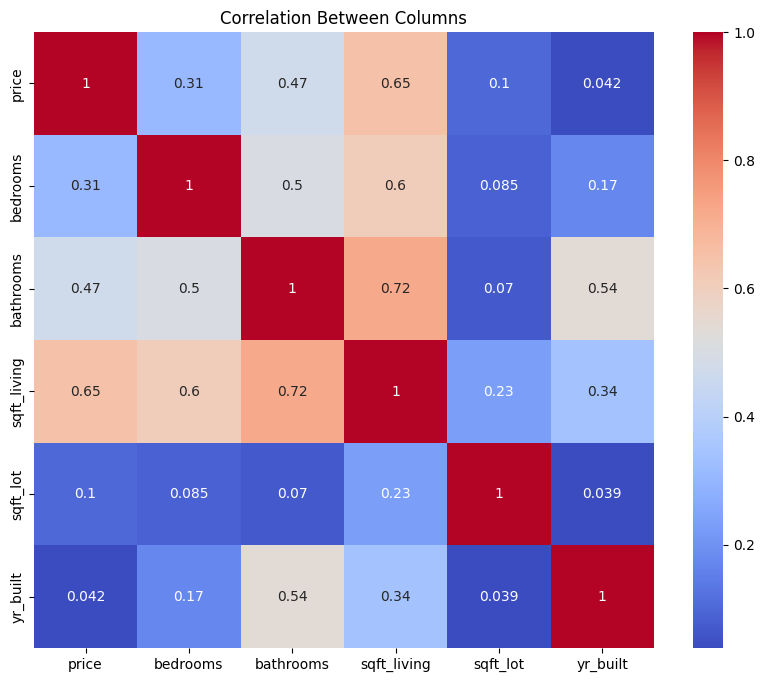

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Columns')
plt.show()

In [26]:
# one hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,False,False,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,False,False,...,False,False,False,False,False,False,False,False,True,False


## regression modelling

 To perform regression modeling, we will split the dataset into features (X) and target variable (y), and then split them into training and testing sets. We will use the LinearRegression model from scikit-learn library to build the regression model.

In [34]:
# Regression Modeling

# Splitting the data into features (X) and target variable (y)
X = data_cleaned[numeric_columns[1:]]
y = data_cleaned[numeric_columns[0]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Regression Model Evaluation:
Mean Squared Error: 32459208655.81
R-squared: 0.50


In [ ]:
## Basic Linear Regression

In [35]:
# Model 1: Basic Linear Regression
X = data_cleaned[numeric_columns[1:]]
y = data_cleaned[numeric_columns[0]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model1.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 1: Basic Linear Regression")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model 1: Basic Linear Regression
Mean Squared Error: 32459208655.81
R-squared: 0.50


In [37]:
# Model 2: Feature Selection
# Selecting features with correlation greater than a threshold
correlation_threshold = 0.8
selected_features = correlation_matrix['price'][correlation_matrix['price'].abs() > correlation_threshold].index.tolist()

X = data_cleaned[selected_features]
y = data_cleaned[numeric_columns[0]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model2.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel 2: Feature Selection")
print(f"Selected Features: {selected_features}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model 2: Feature Selection
Selected Features: ['price']
Mean Squared Error: 0.00
R-squared: 1.00


In [ ]:
## Polynomial Regression

In [38]:

X = data_cleaned[numeric_columns[1:]]
y = data_cleaned[numeric_columns[0]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating and fitting the linear regression model with polynomial features
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred = model3.predict(X_test_poly)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel 3: Polynomial Regression")
print(f"Degree of Polynomial: {poly_features.degree}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model 3: Polynomial Regression
Degree of Polynomial: 2
Mean Squared Error: 31244073332.90
R-squared: 0.52
